## This notebook has a collection of examples of cartopy plots that I found useful from various websites

This is a twitter thread discussing how gridlines can now be added for different map projections:
https://twitter.com/QuLogic/status/1257148289838911488

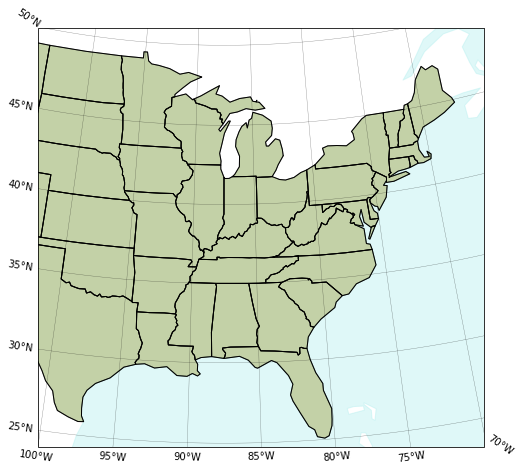

In [9]:
# from https://stackoverflow.com/questions/69530021/how-to-make-cartopy-gridline-labels-show-with-lambert-conformal-projection

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from matplotlib import ticker
#import proplot

plt.figure(figsize=[8,8])

proj = ccrs.LambertConformal(central_longitude=-87.5, central_latitude=32.5)
ax = plt.axes(projection=proj)
ax.set_extent([-100,-70,24,50], ccrs.PlateCarree())
res = '110m' #'50m', '110m'
ax.add_feature(cfeature.OCEAN.with_scale(res),facecolor='paleturquoise',alpha=0.4)
ax.add_feature(cfeature.STATES.with_scale(res),facecolor='olivedrab',alpha=0.4)
ax.add_feature(cfeature.STATES.with_scale(res),edgecolor='black')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False, linewidth=0.33, color='k',alpha=0.5)
gl.right_labels = gl.top_labels = False
gl.ylocator = ticker.FixedLocator([25,30,35,40, 45, 50])
gl.xlocator = ticker.FixedLocator([-100, -95, -90, -85, -80, -75, -70])
plt.show()

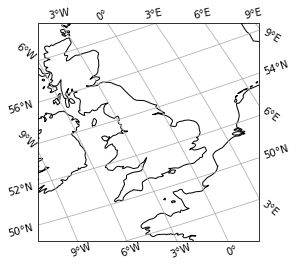

In [2]:
# from https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

rotated_crs = ccrs.RotatedPole(pole_longitude=120.0, pole_latitude=70.0)

ax = plt.axes(projection=rotated_crs)
ax.set_extent([-6, 3, 48, 58], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

plt.show()

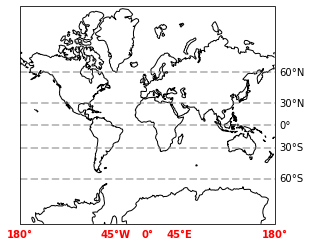

In [3]:
# from https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)


ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.show()

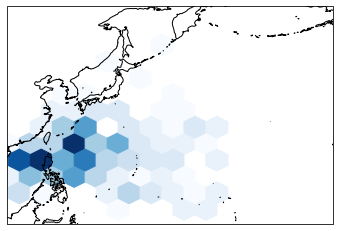

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
lons = np.asarray('''128.6  142.6  144.7  160.8  118.4  123.   112.6  122.2  131.9  134.2
                    127.9  148.1  113.8  110.3  155.   138.7  127.1  153.3  136.9  131.9
                    129.4  127.5  168.7  119.1  125.1  119.9  143.3  130.8  130.3  131.2
                    129.9  129.2  130.3  120.7  119.5  112.8  130.2  144.9  151.9  137.4
                    151.2  143.5  141.7  142.6  142.3  158.6  144.9  127.9  126.4  117.4
                    117.1  124.   129.5  129.1  129.2  137.1  137.1  136.7  114.   133.1
                    130.3  149.8  166.4  131.6  147.4  114.6  136.8  128.5  158.4  143.4
                    132.6  126.5  116.1  138.8  155.8  150.4  162.4  170.1  133.   132.8
                    130.9  130.9  133.4  126.8  112.7  137.5  128.4  130.2  131.8  142.7
                    140.6  124.6  151.9  129.4  111.6  145.8  146.3  117.1  140.1  147.3
                    113.   123.3  122.9  147.1  128.7  120.6  134.5  126.7  127.6  111.4
                    113.8  145.   119.5  130.   132.3  129.4  114.2  124.6  140.6  112.9
                    111.9  116.2  115.6  116.5  153.7  123.8  128.8  138.7  128.8  119.
                    156.1  141.7  142.4  143.3  116.4  119.   121.   132.5  150.3  150.1
                    141.   140.9  160.3  170.8  142.6  111.3  121.5  112.3  144.   120.1
                    116.9  165.   141.6  130.4  162.7  119.7  129.8  115.6  125.   138.9
                    160.6  130.1  142.7  119.9  129.8  114.1  152.7  132.   158.   170.9
                    119.2  118.   157.9  158.3  132.5  155.4  170.3  121.7  111.4  130.2
                    122.8  118.8  149.1  125.6  120.5  126.1  156.2  161.4  132.9  118.4
                    135.7  115.2  159.3  136.   134.3  124.   131.3  113.8  157.5  130.6
                    116.5  126.8  127.   116.2  116.8  120.6  120.1  154.5  132.6  149.1
                    130.2  112.8  161.9  124.7  119.   131.2  131.3  139.2'''.split(), 'f4')
lats = np.asarray('''28.5  15.9  27.9  13.8  12.2  21.5  12.7  19.3  23.3  30.5  14.4  26.6
                     17.9  18.6  17.   18.1  23.7  35.6  21.8  22.5  28.1  16.6  18.8  19.5
                     23.4  26.3  13.6  12.2  11.9  21.8  21.   25.9  27.4  15.1  26.3  16.8
                     27.8  27.7  30.4  19.2  19.5  20.1  18.1  22.9  22.5  20.4  20.9  18.1
                     18.   21.9  21.7  27.7  23.7  24.7  25.2  19.3  19.6  20.4  19.4  26.
                     12.9  13.9  26.3  13.9   8.4  15.6  11.   12.5   4.    9.2  18.   26.7
                     20.4  42.6  16.3  49.3  25.3   9.5  31.6  31.6  23.3  23.2  11.1  27.7
                     16.2  12.6  18.4  18.1  18.2   6.4   8.3  15.6   7.2  32.3  17.9  17.3
                     26.8  10.3  23.2  21.5  20.9  28.5  28.5  18.1  16.9  14.8  20.8  21.
                     13.8  17.4  13.   12.   12.   23.4  24.4  16.6  17.6  18.4   9.1   8.8
                      7.5  18.5  14.1  15.4  14.1  18.9  14.9   9.4  17.8  18.2  18.7  22.1
                     22.   21.8  15.6  19.4  20.   16.    6.4  15.   14.7  20.8  28.6  18.8
                     31.2  15.7  23.1  13.9   7.7  20.1  18.6   4.7   5.6  13.6   4.1  16.2
                     16.1  19.7  34.2  23.3  31.4  16.9  30.1  19.2  20.3   7.9  26.6  25.8
                     27.4  25.9  19.2  19.9   8.6   7.6  35.9  23.2   7.8  29.5  15.7  20.1
                     12.2  19.8  39.3  25.7  11.5  26.6   5.7   5.8  22.1  16.3  16.3  17.2
                     25.6  14.5  16.5  15.2  14.   12.3  20.2  17.9  18.6  20.   19.9  15.5
                     17.8  18.8  19.3  22.   14.1  20.6  25.6   9.8  23.3  17.7  21.7  22.5
                     22.7  32.1'''.split(), 'f4')
ax = plt.subplot(projection=ccrs.PlateCarree(120))
ax.coastlines('50m')
ax.set_extent([110, 200, 0, 60], ccrs.PlateCarree())
ax.hexbin(lons, lats, mincnt=1, gridsize=10,
          cmap=plt.cm.Blues, transform=ccrs.PlateCarree())
plt.show()

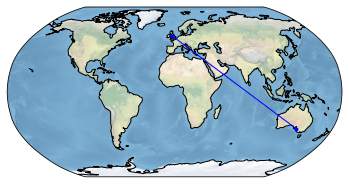

In [8]:
# from https://stackoverflow.com/questions/52827226/plotting-a-straight-line-in-cartopy-robinson-projection/52861074#52861074

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.stock_img()

ad_lat, ad_lon = -34.93, 138.60
liv_lat, liv_lon = 53.41, -2.99

# New bit: transform the given lat/lon points into the Robinson projection
geodetic = ccrs.Geodetic()
robinson = ccrs.Robinson()
ad_lon_t, ad_lat_t = robinson.transform_point(ad_lon, ad_lat, geodetic)
liv_lon_t, liv_lat_t = robinson.transform_point(liv_lon, liv_lat, geodetic)

plt.plot([ad_lon_t, liv_lon_t], [ad_lat_t, liv_lat_t],
         color='blue', linewidth=1, marker='o', markersize=3,
         # Be explicit about which transform you want:
         transform=robinson)

plt.show()

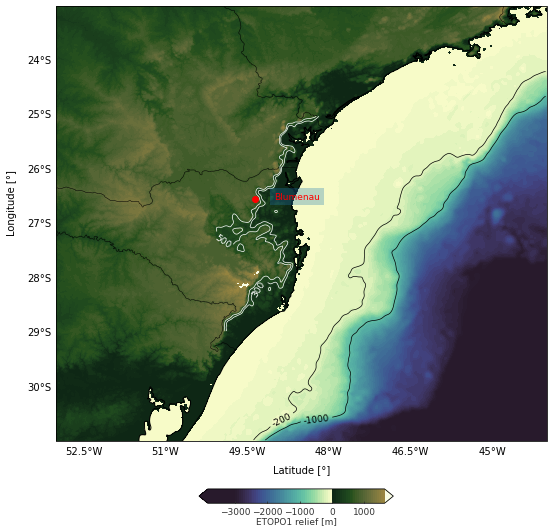

In [11]:
# Import libraries
from scipy.ndimage.filters import gaussian_filter
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cmocean

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
 
# Open ETOPO1 file.
real_bathyfile = "C:/Users/Holdenje/DRIFT/projects/cartopy_implementation/misc_files/etopo1.nc"
bathyfile = "C:/Users/Holdenje/DRIFT/projects/cartopy_implementation/misc_files/ETOPO1_Bed_g_gmt4.grd"
etopo = xr.open_dataset(bathyfile)

# Slice desired coordinates.
etopo = etopo.sel(x=slice(-53,-44), y=slice(-31,-23))  

# Load sliced variables.
lat = etopo.y
lon = etopo.x
topo = etopo.z

# Create figure and plot ETOPO1 data.

# Create figure.
fig  = plt.figure(1,figsize=(10,8),facecolor='w')  

# Use Cartopy projection.
ax = plt.axes(projection=ccrs.PlateCarree())

# Add Cartopy coastines.
ax.coastlines()

# Add gridlines into the figure. We disabled interior gridline but kept 
# the labels.
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='black',alpha=0.0, linestyle='--')

# Disable top and right grid line labels.
gl.top_labels = gl.right_labels = False

# Add 1000 and 200 meters bathymetry lines and labels.
# We will apply a Gaussian filter to smooth the data. 
bathy_levels = [-1000,-200]  

Ct = ax.contour(gaussian_filter(lon,2),gaussian_filter(lat,2),gaussian_filter(topo,2),bathy_levels,colors='black',linewidths=0.7,linestyles='solid')
#Ct = ax.contour(gaussian_filter(lon,2),gaussian_filter(lat,2),gaussian_filter(topo,2),bathy_levels,colors='black',latlon=True,linewidths=0.7,linestyles='solid')

manual_locations = [(-48.2,-31),(-49,-30.5)] 

clbls = plt.clabel(Ct,fmt='%i', fontsize=9,manual=manual_locations,colors="black")

# Add 300 and 500 meters topography line and labels.
# In this case we want to highlight topography over the east side of 
# Santa Catarina State. We will apply a Gaussian filter to smooth data. 
etopo1 = etopo.sel(x=slice(-50.2,-48), y=slice(-29,-25))   
lat1 = etopo1.y
lon1 = etopo1.x
topo1 = etopo1.z
topo_levels = [300,500] 

Ct2 = ax.contour(gaussian_filter(lon1,2),gaussian_filter(lat1,2),gaussian_filter(topo1,2),topo_levels,colors='white',latlon=True,linewidths=0.7,linestyles='solid')

manual_locations2 = [(-49.3,-28.2),(-49.9,-27.2)]       
clbls2 = plt.clabel(Ct2,fmt='%i', fontsize=9,
manual=manual_locations2,colors="white")

# Create min and max data range (and spacing).
clevs = np.arange(-3000,2000,5)

# Plot ETOPO1 data using beautiful cmocean color pallete.
plot = ax.contourf(lon, lat, topo, 100, cmap=cmocean.cm.topo, transform=ccrs.PlateCarree(),vmin=-3000, vmax=3000,extend="both")

# Draw states.                   
states = NaturalEarthFeature(category='cultural', scale='10m', facecolor='none',name='admin_1_states_provinces_lines')
_ = ax.add_feature(states, edgecolor='black',linewidth=0.5)

# Add Latitude/Longitude text labels.
ax.text(-0.08, 0.55, 'Longitude'u' [\N{DEGREE SIGN}]', va='bottom', ha='center', rotation='vertical', rotation_mode='anchor',transform=ax.transAxes)
ax.text(0.5, -0.075, 'Latitude'u' [\N{DEGREE SIGN}]', va='bottom', ha='center',rotation='horizontal', rotation_mode='anchor',transform=ax.transAxes)

# Add text and marker to highlight a location.
# In this case we will highlight the city of Blumenau, 
# located in -49° and -26.55°.
ax.text(-49,-26.55, 'Blumenau',color='red',fontsize=9, bbox=dict(fill=True, edgecolor='black', linewidth=0,alpha=0.3))
ax.plot(-49.358,-26.55, color='red', marker='o', linestyle='dashed',linewidth=2, markersize=6)

# Define colobar options (e.g. min/max range, label and where to place into the plot).
ticks = np.arange(min(clevs),max(clevs),1000)  
cax = fig.add_axes([0.37, 0.017, 0.27, 0.025]) 
cb = fig.colorbar(plot, cax=cax, orientation="horizontal",
panchor=(0.5,0.5),shrink=0.3,ticks=ticks)   

cb.set_label(r'ETOPO1 relief [m]', fontsize=9, color='0.2',labelpad=0) 
cb.ax.tick_params(labelsize=9, length=2, color='0.2', labelcolor='0.2', direction='in') 
cb.set_ticks(ticks) 

plt.show()